# Classifying Whiskies

In this module, we use the Pandas package and spectral co-clustering to group whiskies by flavor similarities.

In [62]:
import numpy as np
import pandas as pd

whisky = pd.read_csv("whiskies.txt")
whisky["Region"] = pd.read_csv("regions.txt")

In [63]:
whisky.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands


In [64]:
whisky.tail()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region
81,82,Tobermory,1,1,1,0,0,1,0,0,1,2,2,2,PA75 6NR,150450,755070,Islands
82,83,Tomatin,2,3,2,0,0,2,2,1,1,2,0,1,IV13 7YT,279120,829630,Highlands
83,84,Tomintoul,0,3,1,0,0,2,2,1,1,2,1,2,AB37 9AQ,315100,825560,Speyside
84,85,Tormore,2,2,1,0,0,1,0,1,2,1,0,0,PH26 3LR,315180,834960,Speyside
85,86,Tullibardine,2,3,0,0,1,0,2,1,1,2,2,1,PH4 1QG,289690,708850,Highlands


In [65]:
whisky.iloc[5:10,0:5]

,RowID,Distillery,Body,Sweetness,Smoky
5,6,ArranIsleOf,2,3,1
6,7,Auchentoshan,0,2,0
7,8,Auchroisk,2,3,1
8,9,Aultmore,2,2,1
9,10,Balblair,2,3,2


In [66]:
whisky.columns

Index(['RowID', 'Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral', 'Postcode', ' Latitude', ' Longitude', 'Region'],
      dtype='object')

In [67]:
# subset to object containing only the flavor attributes
flavors = whisky.iloc[:, 2:14]
flavors

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2
3,4,1,4,4,0,0,2,0,1,2,1,0
4,2,2,2,0,0,1,1,1,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
81,1,1,1,0,0,1,0,0,1,2,2,2
82,2,3,2,0,0,2,2,1,1,2,0,1
83,0,3,1,0,0,2,2,1,1,2,1,2
84,2,2,1,0,0,1,0,1,2,1,0,0


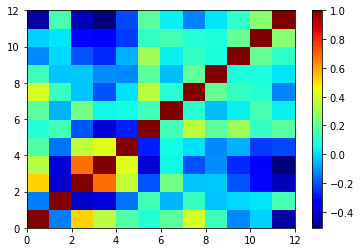

In [68]:
# examine Pearson correlation matrix of flavors
import matplotlib.pyplot as plt
corr_flavors = pd.DataFrame.corr(flavors)
plt.pcolor(corr_flavors)
plt.colorbar()

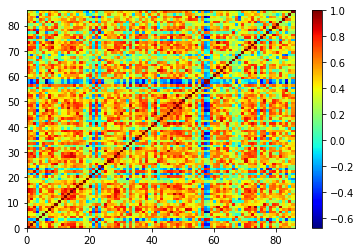

In [69]:
# examine correlations between distilleries
corr_whisky = pd.DataFrame.corr(flavors.transpose())
plt.pcolor(corr_whisky)
plt.colorbar()

In [70]:
# Clustering whiskies based on flavor profiles using spectral co-clustering
from sklearn.cluster import SpectralCoclustering
model = SpectralCoclustering(n_clusters = 6, random_state = 0)
model.fit(corr_whisky)
model.rows_.shape

(6, 86)

In [71]:
# whiskies per cluster
np.sum(model.rows_, axis = 1)

array([ 5, 20, 19,  6, 19, 17])

In [72]:
# clusters per whisky
np.sum(model.rows_, axis = 0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [73]:
model.row_labels_

array([2, 4, 5, 3, 2, 1, 5, 4, 2, 5, 4, 1, 2, 1, 2, 2, 1, 2, 1, 0, 5, 3,
       5, 3, 5, 5, 4, 4, 5, 4, 5, 2, 1, 1, 1, 2, 4, 5, 1, 0, 1, 5, 4, 4,
       4, 1, 2, 1, 1, 5, 5, 4, 4, 4, 1, 0, 2, 3, 3, 1, 5, 2, 4, 2, 2, 4,
       0, 2, 0, 1, 4, 2, 1, 2, 4, 2, 5, 3, 2, 5, 1, 5, 4, 1, 4, 1])

In [74]:
# add column containing row labels
whisky["Group"] = pd.Series(model.row_labels_, index=whisky.index)

# reorder by group labels
whisky = whisky.iloc[np.argsort(model.row_labels_)]

# reset indices
whisky = whisky.reset_index(drop = True)
whisky

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region,Group
0,40,GlenScotia,2,2,2,2,0,1,0,1,2,2,1,1,PA28 6DS,172090,621010,Campbelltown,0
1,56,Isle of Jura,2,1,2,2,0,1,1,0,2,1,1,1,PA60 7XT,152660,667040,Islands,0
2,69,OldPulteney,2,1,2,2,1,0,1,1,2,2,2,2,KW1 5BA,336730,950130,Highlands,0
3,20,Bruichladdich,1,1,2,2,0,2,2,1,2,2,2,2,PA49 7UN,126680,661400,Islay,0
4,67,Oban,2,2,2,2,0,0,2,0,2,2,2,0,PA34 5NH,185940,730190,Highlands,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,50,Glenlossie,1,2,1,0,0,1,2,0,1,2,2,2,IV30 3SS,322640,861040,Speyside,5
82,51,Glenmorangie,2,2,1,1,0,1,2,0,2,1,2,2,IV19 1PZ,276750,883450,Highlands,5
83,21,Bunnahabhain,1,2,1,1,0,1,1,1,1,2,2,3,PA46 7RR,142210,673170,Islay,5
84,7,Auchentoshan,0,2,0,0,0,1,1,0,2,2,3,3,G81 4SJ,247670,672610,Lowlands,5


In [75]:
# Compute correlations of reordered table, keeping only flavor columns, and convert to np array
correlations = pd.DataFrame.corr(whisky.iloc[:,2:14].transpose())
correlations = np.array(correlations)

(0.0, 86.0, 0.0, 86.0)

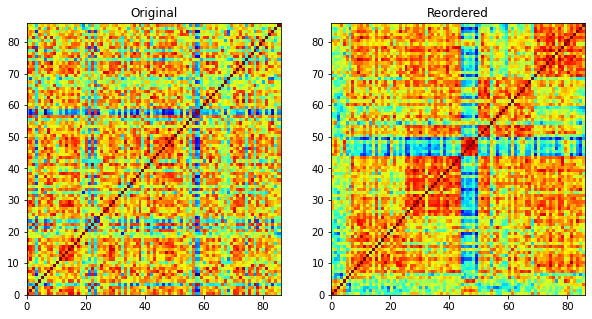

In [77]:
# Plot original and reordered correlations
plt.figure(figsize = (10,5))
plt.set_cmap('jet')
plt.subplot(121)
plt.pcolor(corr_whisky)
plt.title("Original")
plt.axis("tight")
plt.subplot(122)
plt.pcolor(correlations)
plt.title("Reordered")
plt.axis("tight")
